# Google App's Ratings - Data Analysis

### Importing the required modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder = LabelEncoder()

pd.set_option('display.max_columns', None)

### Reading and cleaning data

In [2]:
google_data = pd.DataFrame(pd.read_csv('D://MSBA//BUAN 6346.501 - Big Data - S20//project//google-play-store-apps//googleplaystore.csv'))
googledata_ratings = pd.DataFrame(pd.read_csv('D://MSBA//BUAN 6346.501 - Big Data - S20//project//google-play-store-apps//googleplaystore_user_reviews.csv'))

In [3]:
google_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
googledata_ratings

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


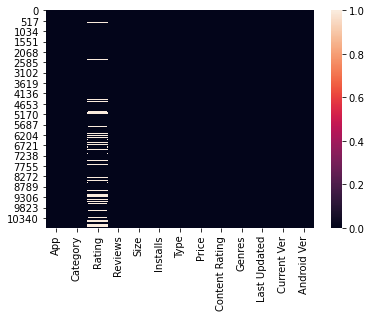

In [5]:
print(google_data.isnull().sum())
sns.heatmap(google_data.isnull(),)

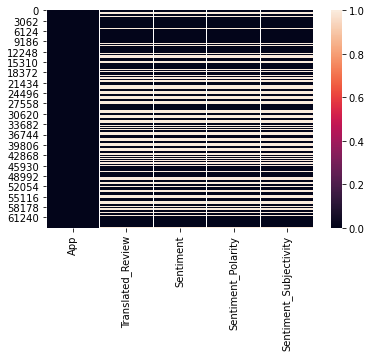

In [6]:
sns.heatmap(googledata_ratings.isnull(),)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x261C1A60>]],
      dtype=object)

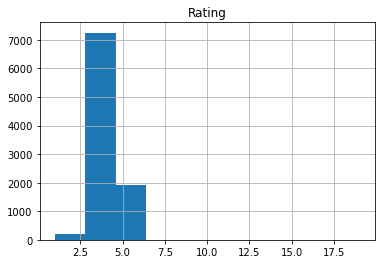

In [7]:
google_data.hist()

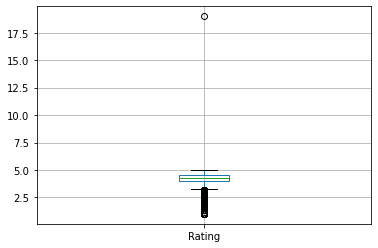

In [8]:
google_data.boxplot()

In [9]:
google_data[google_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
#Remove the row as there is only one outlier to reduce the effect on the model
google_data.drop([10472],inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x26305718>]],
      dtype=object)

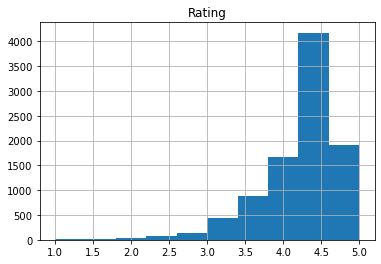

In [11]:
google_data.hist()

In [12]:
#impute with median for ratings column
def impute_median(series):
    return series.fillna(series.median())

google_data.Rating = google_data['Rating'].transform(impute_median)

In [13]:
#imputing with mode for categorical values
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]),inplace = True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]),inplace = True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]),inplace = True)

In [14]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [15]:
google_data['Reviews'] = pd.to_numeric(google_data['Reviews'])
#google_data['Price'] = pd.to_numeric(google_data['Price'])
#google_data['Installs'] = pd.to_numeric(google_data['Installs'])
google_data['Price'] = google_data['Price'].apply(lambda x: str(x).replace("$","") if '$' in str(x) else str(x))
google_data['Price'] = google_data['Price'].apply(lambda x: float(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace("+","") if '+' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(",","") if ',' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: float(x))

google_data['Size'] = google_data['Size'].apply(lambda x: str(x).replace("M","") if 'M' in str(x) else str(x))
google_data['Size'] = google_data['Size'].apply(lambda x: str(x).replace("k","") if 'k' in str(x) else str(x))
google_data['Size'] = google_data['Size'].apply(lambda x: str(x).replace("Varies with device",str(49.2)) if 'Varies with device' in str(x) else str(x))
google_data['Size'] =  pd.to_numeric(google_data['Size'])
google_data["Size"].fillna(49.2, inplace = True) 

In [16]:
google_data.describe()

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,10840.000000,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,38.937555,1.546434e+07,1.027368
std,0.480342,2.927761e+06,90.921793,8.502936e+07,15.949703
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,6.800000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,20.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,49.200000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1020.000000,1.000000e+09,400.000000


###### merging user reviews and main dataset google_data

In [17]:
new_google_data = pd.merge(google_data,googledata_ratings,on='App',how='inner')

In [18]:
new_google_data.isnull().sum()

App                           0
Category                      0
Rating                        0
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Translated_Review         50057
Sentiment                 50047
Sentiment_Polarity        50047
Sentiment_Subjectivity    50047
dtype: int64

In [19]:
new_google_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122657,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,49.2,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN
122658,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,49.2,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN
122659,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,49.2,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200,0.200000
122660,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,49.2,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.000,0.000000


In [20]:
#drop rows with NaN values
drop_rows = new_google_data[new_google_data['Sentiment'].isnull()].index
googleData = new_google_data.drop(drop_rows, axis=0)
drop_rows = googleData[googleData['Translated_Review'].isnull()].index
googleData = googleData.drop(drop_rows, axis=0)

In [21]:
googleData.isnull().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [22]:
googleData.describe()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
count,72605.000000,7.260500e+04,72605.000000,7.260500e+04,72605.000000,72605.000000,72605.000000
mean,4.333623,2.559316e+06,42.001375,7.622361e+07,0.087035,0.157342,0.494230
std,0.280676,6.780453e+06,37.642343,1.878048e+08,1.064462,0.332670,0.240091
min,2.600000,1.000000e+01,1.200000,1.000000e+03,0.000000,-1.000000,0.000000
25%,4.200000,2.466600e+04,20.000000,1.000000e+06,0.000000,0.000000,0.380000
50%,4.400000,1.955580e+05,49.200000,1.000000e+07,0.000000,0.129427,0.509740
75%,4.500000,1.855262e+06,49.200000,1.000000e+08,0.000000,0.356534,0.633333
max,4.900000,7.815831e+07,853.000000,1.000000e+09,29.990000,1.000000,1.000000


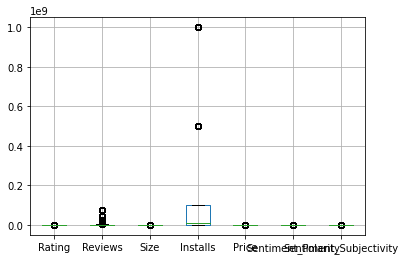

In [23]:
googleData.boxplot()

In [24]:
googleData.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [25]:
dummies = pd.get_dummies(googleData.Category, prefix = 'Category')
googleData = pd.concat([googleData,dummies],axis = 'columns')

dummies = pd.get_dummies(googleData['Content Rating'], prefix = 'Content Rating')
googleData = pd.concat([googleData,dummies],axis = 'columns')


googleData = googleData.drop(columns = ['Category','Content Rating'])

In [26]:
googleData['Type']= label_encoder.fit_transform(googleData['Type'])
googleData['Current Ver']= label_encoder.fit_transform(googleData['Current Ver'])
googleData['Android Ver']= label_encoder.fit_transform(googleData['Android Ver'])
googleData['Sentiment']= label_encoder.fit_transform(googleData['Sentiment'])

googleData['Genres']= label_encoder.fit_transform(googleData['Genres'])

In [27]:
#Drop unnecessary columns for analysis
googleData = googleData.drop(columns = ['Translated_Review','App','Last Updated'])

In [28]:
googleData.head()

,Rating,Reviews,Size,Installs,Type,Price,Genres,Current Ver,Android Ver,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,3.9,967,14.0,500000.0,0,0.0,6,145,11,0,-0.250,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,3.9,967,14.0,500000.0,0,0.0,6,145,11,0,-0.725,0.833333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3.9,967,14.0,500000.0,0,0.0,6,145,11,1,0.000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,3.9,967,14.0,500000.0,0,0.0,6,145,11,2,0.500,0.600000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,3.9,967,14.0,500000.0,0,0.0,6,145,11,0,-0.800,0.900000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Data visualization

In [29]:
group = google_data.groupby('Category')
x = group['Rating'].agg(np.mean)
y = group['Price'].agg(np.mean)
z = group['Reviews'].agg(np.mean)

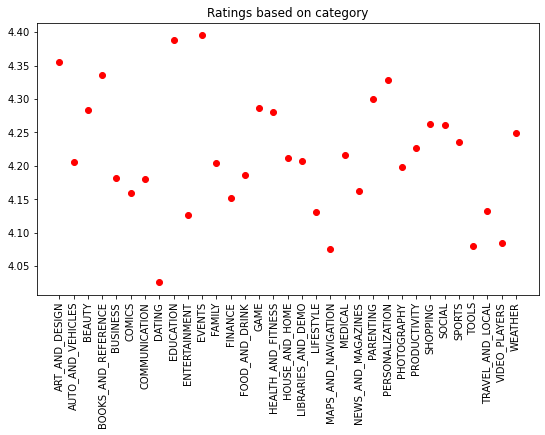

In [30]:
plt.figure(figsize = (9,5))
plt.plot(x,'ro')
plt.title('Ratings based on category')
plt.xticks(rotation = 90)
plt.show()

From the plot we can see that the applications about events have the highest mean rating followed by education

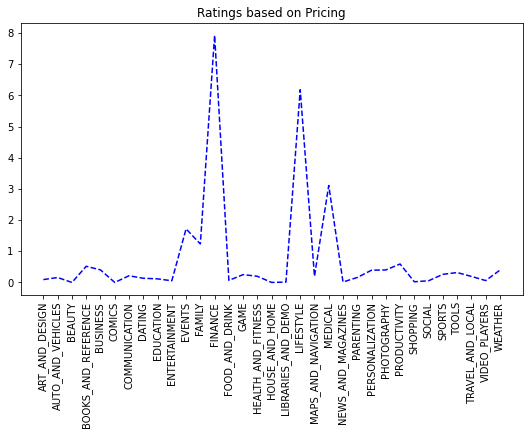

In [31]:
plt.figure(figsize = (9,5))
plt.plot(y,'r--',color = 'blue')
plt.title('Ratings based on Pricing')
plt.xticks(rotation = 90)
plt.show()

It is clear from the graph that financial applications are the most priced apps in the google market.

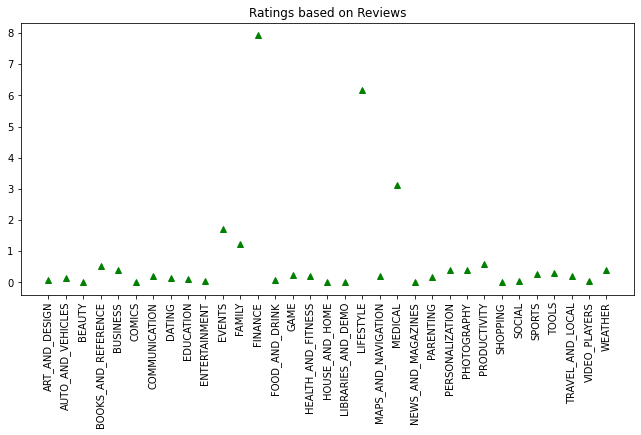

In [32]:
plt.figure(figsize = (11,5))
plt.plot(y,'g^',color = 'green')
plt.title('Ratings based on Reviews')
plt.xticks(rotation = 90)
plt.show()

Again, that financial applications are the most reviewed

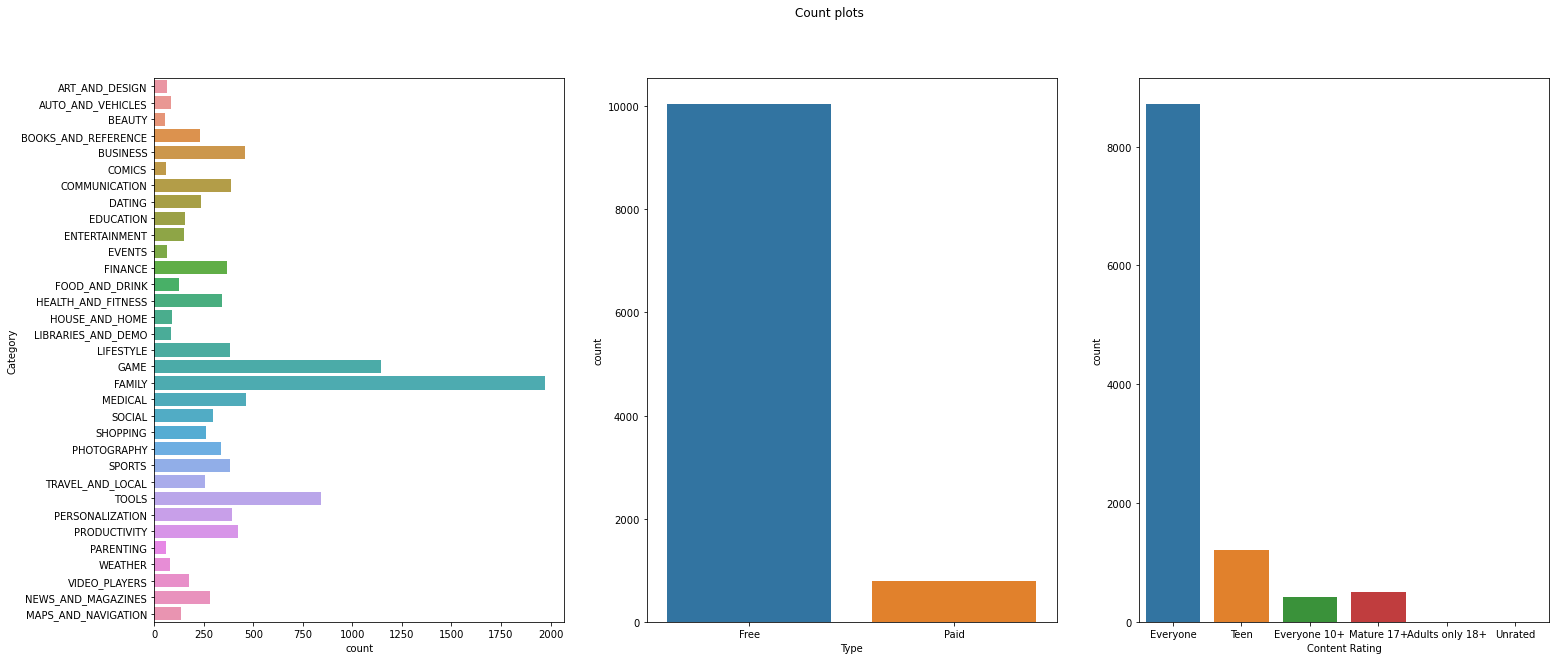

In [33]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(25,10))
plt.suptitle('Count plots')
sns.countplot(y='Category',data=google_data,ax=ax1)
sns.countplot('Type',data=google_data,ax=ax2)
sns.countplot('Content Rating',data=google_data,ax=ax3)
plt.show()

From the above we can see 
- The number of applications in each category
- How many of them are free and paid 
- The ratings based on the age group

### Data Analysis

We will use regression techniques as we are predicting the rating here

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [35]:
X = googleData.drop(columns = 'Rating')
y = googleData['Rating']

#retaining column names
#y = pd.DataFrame(data = y)
#XColumns = X.columns
#yColumns = y.columns

In [36]:
#splitting the data into train and test and standardizing the values
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

#assigning the column names back
#X_test = pd.DataFrame(data = X_test)
#X_test.columns = XColumns
#X_train = pd.DataFrame(data = X_train)
#X_train.columns = XColumns
#y_train = pd.DataFrame(data = y_train)
#y_train.columns = yColumns
#y_test = pd.DataFrame(data = y_test)
#y_test.columns = yColumns

In [37]:
from sklearn.linear_model import LinearRegression 
linearModel = LinearRegression()

In [38]:
linearModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
predictions = linearModel.predict(X_test)
predictions

array([4.27839415, 4.08295958, 4.50987761, ..., 4.18132346, 4.30590575,
       4.42009489])

In [40]:
accuracy = linearModel.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%' 

'Accuracy: 23.95%'

In [41]:
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

('Mean Absolute Error:', 0.1758080124737544)

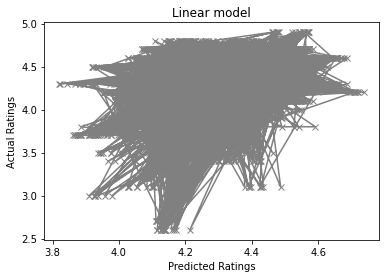

In [42]:
plt.plot(predictions, y_test , color='gray', marker = 'x')
plt.title('Linear model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [44]:
model = KNeighborsRegressor(n_neighbors=15, n_jobs = -1)

In [45]:
model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
                    weights='uniform')

In [46]:
model.predict(X_test)

array([4.32666667, 4.00666667, 4.5       , ..., 4.36      , 4.22666667,
       4.6       ])

In [47]:
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 73.53%'

In [48]:
RFmodel = RandomForestRegressor(n_jobs=-1)

In [49]:
estimators = np.arange(5, 200, 15)
scores = []
for n in estimators:
    RFmodel.set_params(n_estimators=n)
    RFmodel.fit(X_train, y_train)
    scores.append(RFmodel.score(X_test, y_test))

[(5, 0.9989732155380977),
 (20, 0.9993567377975829),
 (35, 0.9992638137978647),
 (50, 0.9991410492851509),
 (65, 0.9994190552117755),
 (80, 0.9992922931307817),
 (95, 0.9992162792734622),
 (110, 0.9992751797525781),
 (125, 0.9993308222447769),
 (140, 0.9993225380000965),
 (155, 0.9992065285852404),
 (170, 0.9992515354170889),
 (185, 0.9992598172662714)]

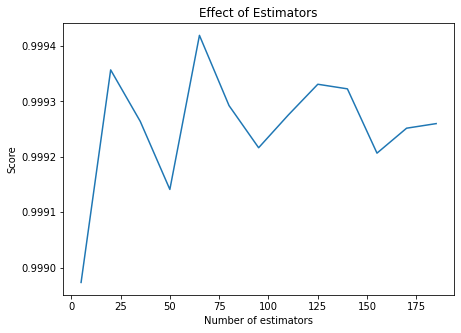

In [50]:
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of estimators")
plt.ylabel("Score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))
results

In [51]:
predictions = RFmodel.predict(X_test)
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

('Mean Absolute Error:', 0.00022747847011153253)

In [52]:
accuracy = RFmodel.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 99.93%'

In [53]:
'Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)

('Mean Squared Error:', 5.62657001456087e-05)

In [54]:
'R^2 Squaared: ', metrics.r2_score(y_test, predictions)

('R^2 Squaared: ', 0.9992598172662714)

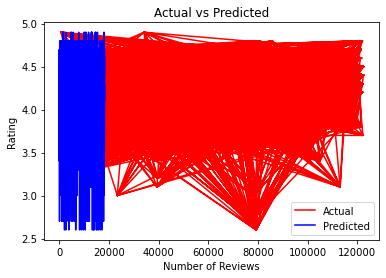

In [55]:
plt.plot(y_test, color = 'red', label = 'Actual')
plt.plot(predictions, color = 'blue', label = 'Predicted')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [56]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor(random_state = 0) 

In [57]:
DT_fit = DTregressor.fit(X_train, y_train)
DT_fit

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [58]:
DTregressor.predict(X_test)

array([3.8, 4.2, 4.5, ..., 4.3, 4.3, 4.6])

In [59]:
accuracy = DTregressor.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 99.79%'

In [60]:
DT_fit_cv = cross_val_score(DT_fit, X_train, y_train, cv = 5)
print("mean cross validation score: {}".format(np.mean(DT_fit_cv)))

mean cross validation score: 0.9982407561415139
